## Mandelbrot. 
### Kristijonas & Julio

## - Task. 
Find out coordinates of any provided image of mandelbrot set fragment.

- The idea is to have a program that generates a Mandelbrot image and that when given any other subsequent image of mandelbrot structure, it can find it within the original structure. 

### Basics
f_c (z) = z**2 + c. (c is complex.)

`f_c(0), f_c(f_c(0)), f_c(f_c(f_c(0)))...` Is each of this iteration a depth level? A deeper fractal division?

Pixels are colored according to how soon the sequence {f_c(0), f_c(f_c(0))...} crosses an arbitrary threshold.

- The Mandelbrot set is the set of values of c in the complex plane for which the orbit of the critical point (z = 0) under iteration of the quadratic map [z_{n+1} = z_{n}**2 + c] remains bounded (within an interval).
 

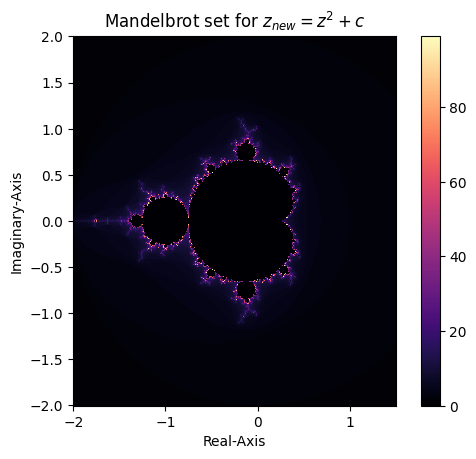

In [1]:
## WIKIPEDIA. 

import numpy as np
import matplotlib.pyplot as plt

# setting parameters (these values can be changed)
xDomain, yDomain = np.linspace(-2,1.5,500), np.linspace(-2,2,500)
bound = 2
power = 2             # any positive floating point value
max_iterations = 100   # any positive integer value
colormap = 'magma'    # set to any matplotlib valid colormap


# computing 2-d array to represent the mandelbrot-set
iterationArray = []
for y in yDomain:
    row = []
    for x in xDomain:
        c = complex(x,y)
        z = 0
        for iterationNumber in range(max_iterations):
            if(abs(z) >= bound):
                row.append(iterationNumber)
                break
            else: z = z**power + c
        else:
            row.append(0)

    iterationArray.append(row)

# plotting the data
ax = plt.axes()
#plt.rc('text', usetex = True)   # uncomment this line to enable use of tex when LaTeX is installed
ax.set_aspect('equal')
graph = ax.pcolormesh(xDomain, yDomain, iterationArray, cmap = colormap)
plt.colorbar(graph)
plt.xlabel("Real-Axis")
plt.ylabel("Imaginary-Axis")
plt.title('Mandelbrot set for $z_{{new}} = z^{{{}}} + c$'.format(power))
plt.show()

## Mandelbrot.
1.- Generate training data. 

2.- Neural network and training of NN.

Need to install tensorflow `pip install tensorflow`

3.- Zoom function. `pip install imageio`

4.- Trial to zoom. 

### ------------------------------------------------- ###

## Training Data via images

Generate a number of 'snippets' of sections of mandelbrot structure. This images are used to train our Neural Network and serve as the foundation of later search. 

In [1]:
## Generate training dataset. 
## Re-do with better quality and larger sample number. 

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image as img
import os

image_size = 15
number_samples = 10

def mandelbrot(h, w, max_iter, x_min, x_max, y_min, y_max):
    """
    Generate Mandelbrot set data.
    h, w (int): Height and width of the image.
    max_iter (int): Maximum number of iterations.
    x_min, x_max, y_min, y_max (float): Bounds of the Mandelbrot region.

    Returns:
    numpy.ndarray: Array of iteration counts.
    """
    y, x = np.ogrid[y_min:y_max:h*1j, x_min:x_max:w*1j]
    c = x + y*1j
    z = c
    divtime = max_iter + np.zeros(z.shape, dtype=int)
    
    for i in range(max_iter):
        z = z**2 + c
        diverge = z * np.conj(z) > 2**2
        div_now = diverge & (divtime == max_iter)
        divtime[div_now] = i
        z[diverge] = 2
        
    return divtime

def save_with_colormap(data, output_path, colormap='magma'):
    """
    Save the Mandelbrot set data with a specified colormap.
    data (numpy.ndarray): Mandelbrot set data.
    output_path (str): Path to save the image.
    colormap (str): Matplotlib colormap to apply.
    """
    plt.figure(figsize=(6, 6))  # Optional: Adjust figure size for better resolution
    plt.imshow(data, cmap=colormap, extent=[-2, 1.5, -2, 2])
    plt.axis('off')  # Remove axis for cleaner images
    plt.tight_layout()
    plt.savefig(output_path, dpi=300, bbox_inches='tight')  # Save as high-quality image
    plt.close()

def generate_data(output_dir, num_samples=number_samples, img_size=(image_size, image_size), colormap='magma'):
    """
    Generate Mandelbrot set training data.
    output_dir (str): Directory to save images.
    num_samples (int): Number of samples to generate.
    img_size (tuple): Resolution of each image.
    colormap (str): Matplotlib colormap to apply.
    """
    os.makedirs(output_dir, exist_ok=True)
    for i in range(num_samples):
        # Randomize bounding box within the Mandelbrot set domain
        x_min = np.random.uniform(-2, -0.8)
        x_max = np.random.uniform(x_min + 0.1, x_min + 0.6)
        y_min = np.random.uniform(-1.4, 1.4 - (x_max - x_min))
        y_max = y_min + (x_max - x_min)
        
        # Generate Mandelbrot set data
        mandel = mandelbrot(img_size[1], img_size[0], max_iter=100, 
                            x_min=x_min, x_max=x_max, y_min=y_min, y_max=y_max)
        
        # Save the image with the specified colormap
        output_path = (os.path.join(output_dir, f"{i}_{x_min:.6f}_{x_max:.6f}_{y_min:.6f}_{y_max:.6f}.png")) # Name of the image. 
        save_with_colormap(mandel, output_path, colormap=colormap)

# Generate 1000 samples with magma colormap
generate_data("newbie", num_samples=number_samples, img_size=(image_size, image_size), colormap='magma')


C:\Users\julio\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 206s 8s/step - loss: 612.8496 - mae: 7.0892 - val_loss: 1.0816 - val_mae: 0.9059
Epoch 2/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 157s 6s/step - loss: 1.0877 - mae: 0.9195 - val_loss: 1.0588 - val_mae: 0.9125
Epoch 3/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 163s 6s/step - loss: 1.0780 - mae: 0.9178 - val_loss: 1.0515 - val_mae: 0.9095
Epoch 4/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 159s 6s/step - loss: 1.0426 - mae: 0.9007 - val_loss: 1.0464 - val_mae: 0.9068
Epoch 5/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 155s 6s/step - loss: 1.0505 - mae: 0.9040 - val_loss: 1.0400 - val_mae: 0.9031
Epoch 6/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 179s 7s/step - loss: 1.0225 - mae: 0.8876 - val_loss: 1.0318 - val_mae: 0.8999
Epoch 7/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 179s 7s/step - loss: 1.0224 - mae: 0.8897 - val_loss: 1.0255 - val_mae: 0.8986
Epoch 8/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 131s 5s/step - loss: 1.0240 - mae: 0.8891 - val_loss: 1.0090 - val_mae: 0.8878
Epoch 9/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 125s 5s/step - loss: 1.0

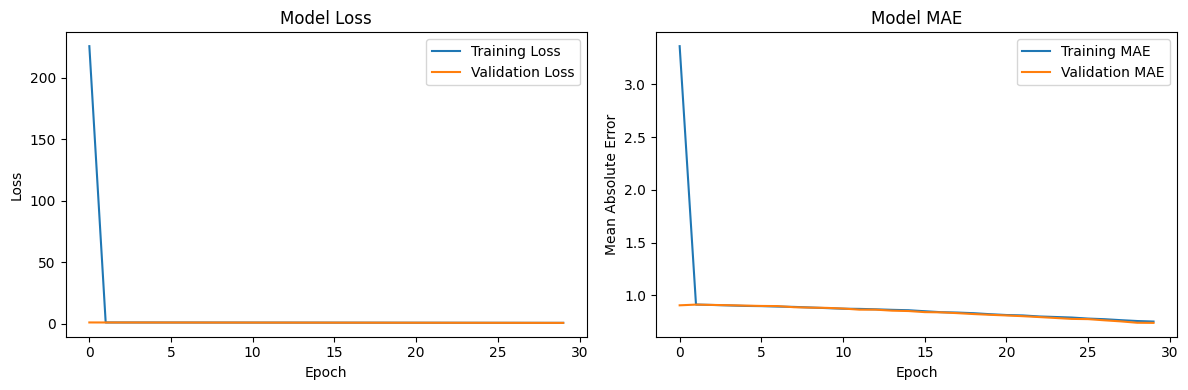


Final Training Metrics:
Loss: 0.7624
MAE: 0.7521

Final Validation Metrics:
Validation Loss: 0.7286
Validation MAE: 0.7393
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 444ms/step

Coordinate Prediction Accuracy (within tolerance of 0.1 ):
x_min accuracy: 1.00%
x_max accuracy: 0.00%
y_min accuracy: 12.00%
y_max accuracy: 11.00%


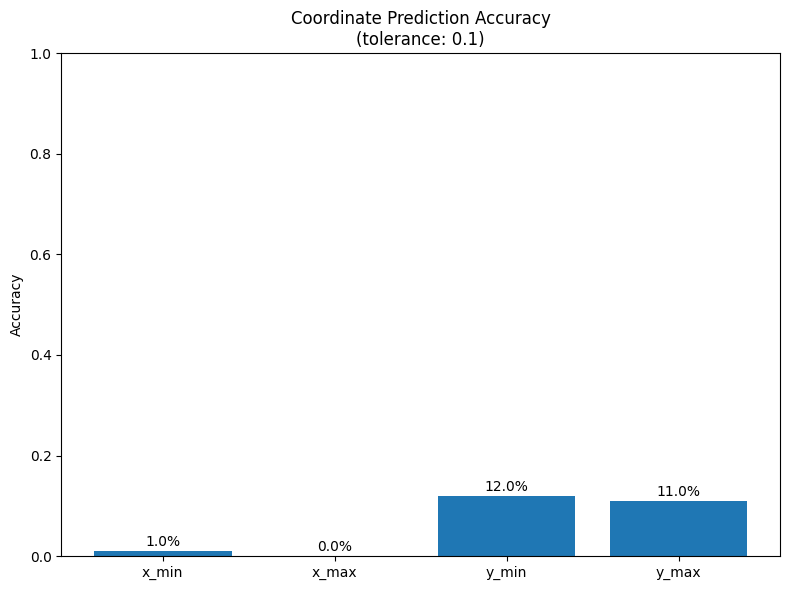

In [3]:
### 2. Train the NN. 
### Using tensorflow. 
import tensorflow #type:ignore
from tensorflow.keras import layers, models #type:ignore
import glob
import numpy as np
from PIL import Image
from tensorflow.keras.callbacks import EarlyStopping
import os
from tensorflow.keras.optimizers import Adam

image_size = 480
number_samples = 1000

data_dir = "mandelbrot_training_highQuality" 

def load_data(data_dir, img_size=(image_size, image_size)):
    images, labels = [], []
    for file in glob.glob(f"{data_dir}/*.png"):
        #base_name = os.path.basename(file).split(".")[0]  # Remove the extension
        base_name = os.path.basename(file).replace(".png", "")
        parts = base_name.split("_")  # Split the name by "_"
        parts.pop(0) # Eliminate index
        #print(parts)
        x_min = float(parts[0])
        x_max = float(parts[1])
        y_min = float(parts[2])
        y_max = float(parts[3])

        #[x_min, x_max, y_min, y_max] = map(float,parts) # Takes the 4 coordinates of the image.
        # CHANGED HERE
        img = Image.open(file).convert('L')  # Convert to grayscale
        # CHANGED HERE
        img = np.array(img.resize(img_size)) / 255.0
        # CHANGED HERE
        img = img.reshape(img_size[0], img_size[1], 1)  # Reshape to (64, 64, 1)
        
        images.append(img)
        labels.append([x_min, x_max, y_min, y_max])

    # return np.expand_dims(np.array(images), axis=-1), np.array(labels)
    return np.array(images), np.array(labels) # CHANGED HERE

def evaluate_coordinate_accuracy(model, X_test, y_test, tolerance=0.1):
    """
    Evaluate the model's accuracy in predicting coordinates within a given tolerance.
    
    Args:
        model: The trained model
        X_test: Test images
        y_test: True coordinates [x_min, x_max, y_min, y_max]
        tolerance: Maximum allowed difference between predicted and true coordinates
    
    Returns:
        numpy array: Accuracy for each coordinate [x_min_acc, x_max_acc, y_min_acc, y_max_acc]
    """
    # Get predictions
    predictions = model.predict(X_test)
    
    # Calculate absolute differences for each coordinate
    coord_diffs = np.abs(predictions - y_test)
    
    # Calculate accuracy within tolerance for each coordinate
    coord_accuracy = (coord_diffs <= tolerance).mean(axis=0)
    
    print("\nCoordinate Prediction Accuracy (within tolerance of", tolerance, "):")
    print(f"x_min accuracy: {coord_accuracy[0]:.2%}")
    print(f"x_max accuracy: {coord_accuracy[1]:.2%}")
    print(f"y_min accuracy: {coord_accuracy[2]:.2%}")
    print(f"y_max accuracy: {coord_accuracy[3]:.2%}")
    
    return coord_accuracy

# Load training data
X_train, y_train = load_data("mandelbrot_training_highQuality")
# Build the CNN model
# model = models.Sequential([ # Each layer output serves as input for the next
#     layers.Input(shape=(image_size, image_size, 1)), # Shape of data
#     layers.Conv2D(32, (3, 3), activation='relu'),    # 32 filter of 3*3 size to detect patterns
#     layers.MaxPooling2D((2, 2)),                     # Reduces by 2 the spatial dimentions (64/2)
#     layers.Conv2D(64, (3, 3), activation='relu'),    # 62 filters of 3*3
#     layers.MaxPooling2D((2, 2)),                     # Reduces by 2 (32/2)
#     layers.Conv2D(128, (3, 3), activation='relu'),   # 128 filters of 3*3
#     layers.Flatten(),
#     layers.Dense(128, activation='relu'),            # 128 neurons
#     layers.Dense(4)                                  # Predicting x_min, x_max, y_min, y_max
# ])

# New model architecture with some dropout
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(image_size, image_size, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.1),  # Add dropout
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.1),  # Add dropout
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Dropout(0.1),  # Add dropout
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),  # Adad dropout
    layers.Dense(4)  # Output layer
])

model.compile(optimizer=Adam(learning_rate=0.001),                #Adjusts learning rates dynamically for efficient training
            loss='mse',                    # Mean squared error
            metrics=['mae'])

import matplotlib.pyplot as plt
# Train the model
# epochs: Number of times that goes through the dataset.
# batch_size = number of images processed before updating weights. 
# Validation split = % of data used for validation, not training. 
# model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# model.save("mandelbrot_CNN_model.keras")

# Train the model and store the history
# Create a directory for saving plots if it doesn't exist
plots_dir = "training_plots"
os.makedirs(plots_dir, exist_ok=True)

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,  # number of epochs to wait before stopping
    restore_best_weights=True,  # restore model weights from the epoch with the best value
    mode='min',
    min_delta=0.001
)


# Train the model and store the history
history = model.fit(X_train, y_train, 
                   epochs=30,  # increased
                   batch_size=32, 
                   validation_split=0.2,
                   callbacks=[early_stopping],
                   verbose=1)

# Create and save training curves
plt.figure(figsize=(12, 4))

# Loss curves
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# MAE curves
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Model MAE')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend()

plt.tight_layout()

# Save the training curves plot
plt.savefig(os.path.join(plots_dir, 'training_curves.png'))
plt.show()
plt.close()

# Create and save coordinate accuracy plot
def plot_coordinate_accuracy(accuracies, tolerance):
    plt.figure(figsize=(8, 6))
    coordinates = ['x_min', 'x_max', 'y_min', 'y_max']
    plt.bar(coordinates, accuracies)
    plt.title(f'Coordinate Prediction Accuracy\n(tolerance: {tolerance})')
    plt.ylabel('Accuracy')
    plt.ylim(0, 1)
    
    # Add percentage labels on top of each bar
    for i, v in enumerate(accuracies):
        plt.text(i, v + 0.01, f'{v:.1%}', ha='center')
    
    plt.tight_layout()
    plt.savefig(os.path.join(plots_dir, 'coordinate_accuracy.png'))
    plt.show()
    plt.close()

# Print final metrics
print("\nFinal Training Metrics:")
print(f"Loss: {history.history['loss'][-1]:.4f}")
print(f"MAE: {history.history['mae'][-1]:.4f}")
print("\nFinal Validation Metrics:")
print(f"Validation Loss: {history.history['val_loss'][-1]:.4f}")
print(f"Validation MAE: {history.history['val_mae'][-1]:.4f}")

# Save metrics to a text file
with open(os.path.join(plots_dir, 'training_metrics.txt'), 'w') as f:
    f.write("Final Training Metrics:\n")
    f.write(f"Loss: {history.history['loss'][-1]:.4f}\n")
    f.write(f"MAE: {history.history['mae'][-1]:.4f}\n\n")
    f.write("Final Validation Metrics:\n")
    f.write(f"Validation Loss: {history.history['val_loss'][-1]:.4f}\n")
    f.write(f"Validation MAE: {history.history['val_mae'][-1]:.4f}\n")

# Evaluate coordinate accuracy
X_test = X_train[-100:]  # Using last 100 samples as test set
y_test = y_train[-100:]
tolerance = 0.1
accuracies = evaluate_coordinate_accuracy(model, X_test, y_test, tolerance)

# Plot and save coordinate accuracy
plot_coordinate_accuracy(accuracies, tolerance)

# Save the model
model.save("mandelbrot_CNN_model_updated.keras")

In [7]:
parts = ['-1.222764', '-1.122167', '-1.294770', '-1.194172']
min_x = float(parts[0])
print(min_x)
print(type(min_x))


-1.222764
<class 'float'>


In [2]:
#### Zoom function and trial
import imageio

def zoom_in(snippet, model, full_width=800, full_height=600, zoom_steps=30):
    # Predict bounding box
    snippet_resized = np.expand_dims(np.array(snippet.resize((64, 64))) / 255.0, axis=(0, -1))
    x_min, x_max, y_min, y_max = model.predict(snippet_resized)[0]
    
    # Generate zoom-in animation
    for step in range(zoom_steps):
        interp_x_min = x_min + (-2 - x_min) * (1 - step / zoom_steps)
        interp_x_max = x_max + (0.8 - x_max) * (1 - step / zoom_steps)
        interp_y_min = y_min + (-1.4 - y_min) * (1 - step / zoom_steps)
        interp_y_max = y_max + (1.4 - y_max) * (1 - step / zoom_steps)

        mandel_zoom = mandelbrot(full_height, full_width, 100, 
                                 interp_x_min, interp_x_max, interp_y_min, interp_y_max)
        
        plt.figure(figsize=(12, 8))
        plt.imshow(mandel_zoom, cmap='magma', extent=[interp_x_min, interp_x_max, interp_y_min, interp_y_max])
        plt.title(f'Zoom Step {step + 1}/{zoom_steps}')
        plt.colorbar(label='Iteration count')
        plt.show()

In [3]:
import numpy as np
import imageio
import matplotlib.pyplot as plt
from PIL import Image

def zoom_in(snippet, model, full_width=800, full_height=600, zoom_steps=30, gif_filename="zoom_animation.gif"):
    # Predict bounding box
    snippet_resized = np.expand_dims(np.array(snippet.resize((65, 65))) / 255.0, axis=(0, -1))
    x_min, x_max, y_min, y_max = model.predict(snippet_resized)[0]
    
    # Create a list to store the frames
    frames = []
    
    # Generate zoom-in animation frames
    for step in range(zoom_steps):
        interp_x_min = x_min + (-2 - x_min) * (1 - step / zoom_steps)
        interp_x_max = x_max + (0.8 - x_max) * (1 - step / zoom_steps)
        interp_y_min = y_min + (-1.4 - y_min) * (1 - step / zoom_steps)
        interp_y_max = y_max + (1.4 - y_max) * (1 - step / zoom_steps)

        mandel_zoom = mandelbrot(full_height, full_width, 100, 
                                 interp_x_min, interp_x_max, interp_y_min, interp_y_max)
        
        # Plot the Mandelbrot set for the current step
        fig, ax = plt.subplots(figsize=(12, 8))
        ax.imshow(mandel_zoom, cmap='magma', extent=[interp_x_min, interp_x_max, interp_y_min, interp_y_max])
        ax.set_title(f'Zoom Step {step + 1}/{zoom_steps}')
        ax.set_xlabel("Re")
        ax.set_ylabel("Im")
        plt.colorbar(ax.imshow(mandel_zoom, cmap='magma'), label='Iteration count')

        # Draw the plot to the canvas and capture the image
        fig.canvas.draw()  # Draw the plot
        image_buf = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)
        image_buf = image_buf.reshape(fig.canvas.get_width_height()[::-1] + (3,))  # Convert to RGB shape
        
        frames.append(image_buf)  # Append the frame

        plt.close(fig)  # Close the figure to prevent display in the notebook
    
    # Save all frames as a GIF
    imageio.mimsave(gif_filename, frames, duration=0.1)  # Adjust duration for speed of the GIF

    print(f"GIF saved as {gif_filename}")


In [5]:
from tensorflow.keras.models import load_model # type: ignore
model = load_model("mandelbrot_CNN_model.keras")

# Example usage
#snippet_img = Image.open("C:\\Users\\julio\\OneDrive\\Desktop\\VU\\3rdSemester\\AI\\Mandelbrot\\search_mandelbrot.png").convert('L')
snippet_img = Image.open("search_mandelbrot.png").convert('L')

zoom_in(snippet_img, model)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 353ms/step


C:\Users\julio\AppData\Local\Temp\ipykernel_11924\3895238931.py:34: MatplotlibDeprecationWarning: The tostring_rgb function was deprecated in Matplotlib 3.8 and will be removed two minor releases later. Use buffer_rgba instead.
  image_buf = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)


GIF saved as zoom_animation.gif


In [22]:
print("C:\\Users\\julio\\OneDrive\\Desktop\\VU\\3rdSemester\\AI\\Mandelbrot\\zoom_animation.gif")

C:\Users\julio\OneDrive\Desktop\VU\3rdSemester\AI\Mandelbrot\zoom_animation.gif


In [13]:
import os
print(os.getcwd())

c:\Users\julio\OneDrive\Desktop\VU\3rdSemester\AI\Mandelbrot
C:\Users\julio\OneDrive\Desktop\VU\3rdSemester\AI\Mandelbrot\search_mandelbrot.png


In [26]:
import PySimpleGUI as sg
from PIL import Image, ImageTk, ImageSequence

gif_filename = 'zoom_animation.gif'

layout = [[sg.Image(key='-IMAGE-')]]

window = sg.Window('Window Title', layout, element_justification='c', margins=(0,0), element_padding=(0,0), finalize=True)

interframe_duration = Image.open(gif_filename).info['duration']

while True:
    for frame in ImageSequence.Iterator(Image.open(gif_filename)):
        event, values = window.read(timeout=interframe_duration)
        if event == sg.WIN_CLOSED:
            exit(0)
        window['-IMAGE-'].update(data=ImageTk.PhotoImage(frame) )

NameError: name 'exit' is not defined